# Here i have imported all my necessary libraries.

In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

# Here i have give the path of my data to these two variables

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

# Here i have make the function of creating dataframe to store my data

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

# I have used the tqdm library to extract images from my dataset

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")  
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

# Here i have normalize the images.

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

# Here i am using label encoder to encode my target variable

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

# this is my custom CNN function with 18 layers .

In [20]:
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(48, 48, 1)))  # Input layer

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

print(len(model.layers)) 

18


# this is the code for finding the summary of my Custom CNN code 

In [24]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model based on your architecture
model = Sequential()
model.add(Input(shape=(48, 48, 1)))  # Input layer

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

# Build the model explicitly
model.build()  # Ensure the model is built before accessing the output shapes

# Generate model summary
model.summary()

# Create a formatted table for the architecture
layer_details = []
for layer in model.layers:
    layer_type = layer.__class__.__name__
    config = layer.get_config()
    #output_shape = layer.output_shape
    params = layer.count_params()
    layer_details.append((layer_type,  params))

# Print the details in a neat table format
# Print the details in a neat table format
print(f"{'Layer (type)':<20}{'Param #':<10}")
print("=" * 35)
for detail in layer_details:
    print(f"{detail[0]:<20}{detail[1]:<10}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

Layer (type)        Param #   
Conv2D              1280      
MaxPooling2D        0         
Dropout             0         
Conv2D              295168    
MaxPooling2D        0         
Dropout             0         
Conv2D              1180160   
MaxPooling2D        0         
Dropout             0         
Conv2D              2359808   
MaxPooling2D        0         
Dropout             0         
Flatten             0         
Dense               262656    
Dropout             0         
Dense               131328    
Dropout             0         
Dense               1799      


# Here i have done the AUgMENTATION PART using adam optimizer , loss function as categorical cross-entropy 

In [25]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

# Here I have done the training part of my data with batch size 128 and 100 epochs I have commented it I have saven the model in json and keras file.

In [26]:
# model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

In [27]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the model in the recommended Keras format
model.save("emotiondetector.keras")


In [28]:
from keras.models import model_from_json

In [29]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [30]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [31]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [32]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
model prediction is  sad


C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is  sad


C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


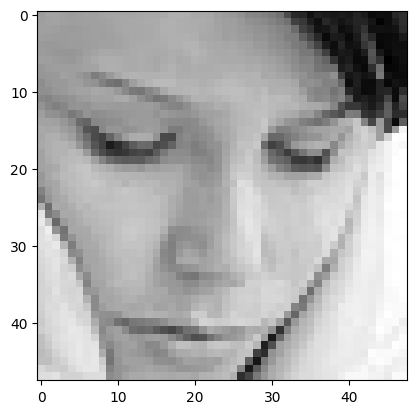

In [34]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
model prediction is  sad


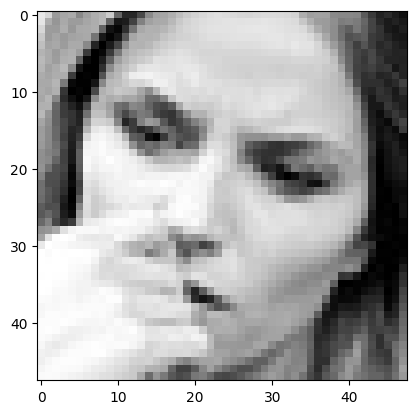

In [35]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  disgust


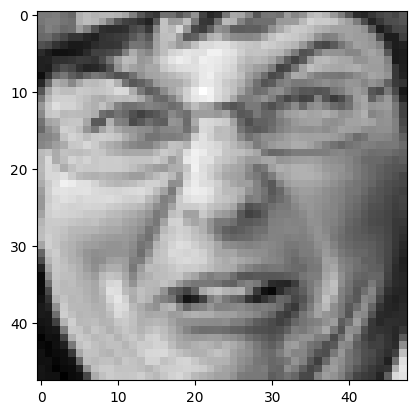

In [36]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  happy


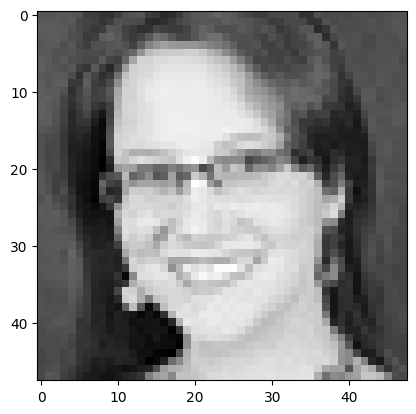

In [37]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
model prediction is  surprise


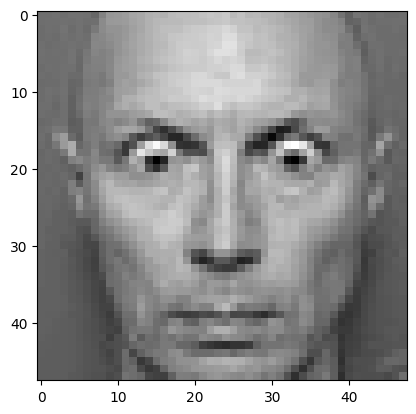

In [38]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

# This is the code for webcam here you can visualize the emotion in real time .

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np
# from keras_preprocessing.image import load_img
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

model.load_weights("emotiondetector.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

webcam=cv2.VideoCapture(0)
labels = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprise'}
while True:
    i,im=webcam.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(im,1.3,5)
    try: 
        for (p,q,r,s) in faces:
            image = gray[q:q+s,p:p+r]
            cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            # print("Predicted Output:", prediction_label)
            # cv2.putText(im,prediction_label)
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
        cv2.imshow("Output",im)
        cv2.waitKey(27)
    except cv2.error:
        pass

# Till this my first methof of this project tis done and accuracy part i have insert in report .

# from here i have using svm, and i have done this by first i have have tried to find the featires using HOG features and then create a histogram and by using this histogram i have used svm to classify the images for their emotions also in this i have reduct the dimension using pca.

In [40]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# === Constants ===
imageSize = 32  # Resize all images to this size (if necessary)
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

# === Function to Load Data ===
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

# === Load Train and Test Data ===
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test)

# === Label Encoding ===
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

# === Train-Test Split ===
X_train, X_val, y_train_split, y_val_split = train_test_split(train['image'], y_train, test_size=0.2, random_state=42)

# === Function to Extract HOG Features ===
def extract_hog_features(images):
    hog_features = []
    for img_path in tqdm(images):
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, (imageSize, imageSize))  # Resize image to consistent size
        gray_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
        
        # Extract HOG features
        features, hog_image = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                                  block_norm='L2-Hys', visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

# === Extract HOG Features for Train, Validation, and Test Sets ===
print("Extracting HOG features for training set...")
X_train_hog = extract_hog_features(X_train)
X_val_hog = extract_hog_features(X_val)
print("Extracting HOG features for test set...")
X_test_hog = extract_hog_features(test['image'])

# === Standardize HOG Features ===
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_val_hog = scaler.transform(X_val_hog)
X_test_hog = scaler.transform(X_test_hog)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10

100%|█████████████████████████████████████████████████████████████████████████████| 5765/5765 [00:11<00:00, 510.99it/s]


Extracting HOG features for test set...


100%|█████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:12<00:00, 565.76it/s]


# Here I have train the svm and find the performance and accuracy of the svm classififer

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from joblib import Parallel, delayed
import pickle

# === Apply PCA to Reduce Dimensionality ===
print("Applying PCA to reduce dimensionality...")
pca = PCA(n_components=100)  # You can adjust this number
X_train_hog = pca.fit_transform(X_train_hog)
X_val_hog = pca.transform(X_val_hog)
X_test_hog = pca.transform(X_test_hog)

# === Train the SVM Classifier ===
print("Training SVM classifier...")
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train_hog, y_train_split)

# === Evaluate the Model on Validation Set ===
val_predictions = svm_classifier.predict(X_val_hog)
val_accuracy = accuracy_score(y_val_split, val_predictions)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# === Evaluate the Model on Test Set ===
test_predictions = svm_classifier.predict(X_test_hog)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')

# === Classification Report ===
print("Classification Report on Test Set:")
# Set zero_division=0 to avoid warnings
print(classification_report(y_test, test_predictions, target_names=le.classes_, zero_division=0))

# === Save the Model and Scaler ===
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_classifier, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# === Other Method: Random Forest for Comparison ===
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest Classifier...")
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_classifier.fit(X_train_hog, y_train_split)

# Evaluate Random Forest on Test Set
rf_test_predictions = rf_classifier.predict(X_test_hog)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print(f'Random Forest Test Accuracy: {rf_test_accuracy:.4f}')


Applying PCA to reduce dimensionality...
Training SVM classifier...
Validation Accuracy: 0.3755
Test Accuracy: 0.3893
Classification Report on Test Set:
              precision    recall  f1-score   support

       angry       0.31      0.17      0.22       960
     disgust       0.00      0.00      0.00       111
        fear       0.29      0.17      0.22      1018
       happy       0.46      0.72      0.56      1825
     neutral       0.36      0.37      0.36      1216
         sad       0.31      0.30      0.30      1139
    surprise       0.45      0.38      0.41       797

    accuracy                           0.39      7066
   macro avg       0.31      0.30      0.30      7066
weighted avg       0.36      0.39      0.36      7066

Training Random Forest Classifier...
Random Forest Test Accuracy: 0.4097


In [52]:
# After training and predicting with the SVM model
test_predictions = svm_classifier.predict(X_test_hog)
svm_test_accuracy = accuracy_score(y_test, test_predictions)


# In this code I have applied the Naive baye's, LDA, QDA other than SVM to check about accuracy.

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === Naive Bayes ===
print("\nTraining Naive Bayes Classifier...")
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_hog, y_train_split)

# Validate and Test
nb_val_predictions = nb_classifier.predict(X_val_hog)
nb_test_predictions = nb_classifier.predict(X_test_hog)

nb_val_accuracy = accuracy_score(y_val_split, nb_val_predictions)
nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)

print(f"Naive Bayes Validation Accuracy: {nb_val_accuracy:.4f}")
print(f"Naive Bayes Test Accuracy: {nb_test_accuracy:.4f}")
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, nb_test_predictions, target_names=le.classes_))

# === LDA ===
print("\nTraining Linear Discriminant Analysis (LDA)...")
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_hog, y_train_split)

# Validate and Test
lda_val_predictions = lda_classifier.predict(X_val_hog)
lda_test_predictions = lda_classifier.predict(X_test_hog)

lda_val_accuracy = accuracy_score(y_val_split, lda_val_predictions)
lda_test_accuracy = accuracy_score(y_test, lda_test_predictions)

print(f"LDA Validation Accuracy: {lda_val_accuracy:.4f}")
print(f"LDA Test Accuracy: {lda_test_accuracy:.4f}")
print("\nClassification Report (LDA):")
print(classification_report(y_test, lda_test_predictions, target_names=le.classes_))

# === QDA ===
print("\nTraining Quadratic Discriminant Analysis (QDA)...")
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train_hog, y_train_split)

# Validate and Test
qda_val_predictions = qda_classifier.predict(X_val_hog)
qda_test_predictions = qda_classifier.predict(X_test_hog)

qda_val_accuracy = accuracy_score(y_val_split, qda_val_predictions)
qda_test_accuracy = accuracy_score(y_test, qda_test_predictions)

print(f"QDA Validation Accuracy: {qda_val_accuracy:.4f}")
print(f"QDA Test Accuracy: {qda_test_accuracy:.4f}")
print("\nClassification Report (QDA):")
print(classification_report(y_test, qda_test_predictions, target_names=le.classes_))


Training Naive Bayes Classifier...
Naive Bayes Validation Accuracy: 0.3648
Naive Bayes Test Accuracy: 0.3731

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

       angry       0.33      0.13      0.19       960
     disgust       0.23      0.14      0.18       111
        fear       0.29      0.13      0.18      1018
       happy       0.46      0.65      0.54      1825
     neutral       0.36      0.29      0.32      1216
         sad       0.27      0.40      0.32      1139
    surprise       0.40      0.46      0.43       797

    accuracy                           0.37      7066
   macro avg       0.33      0.32      0.31      7066
weighted avg       0.36      0.37      0.35      7066


Training Linear Discriminant Analysis (LDA)...
LDA Validation Accuracy: 0.3709
LDA Test Accuracy: 0.3803

Classification Report (LDA):
              precision    recall  f1-score   support

       angry       0.32      0.17      0.22       960
     disgu

# here i have make accuacy graph of all the classififer with all the clasess and i got there is high accuracy in svm.

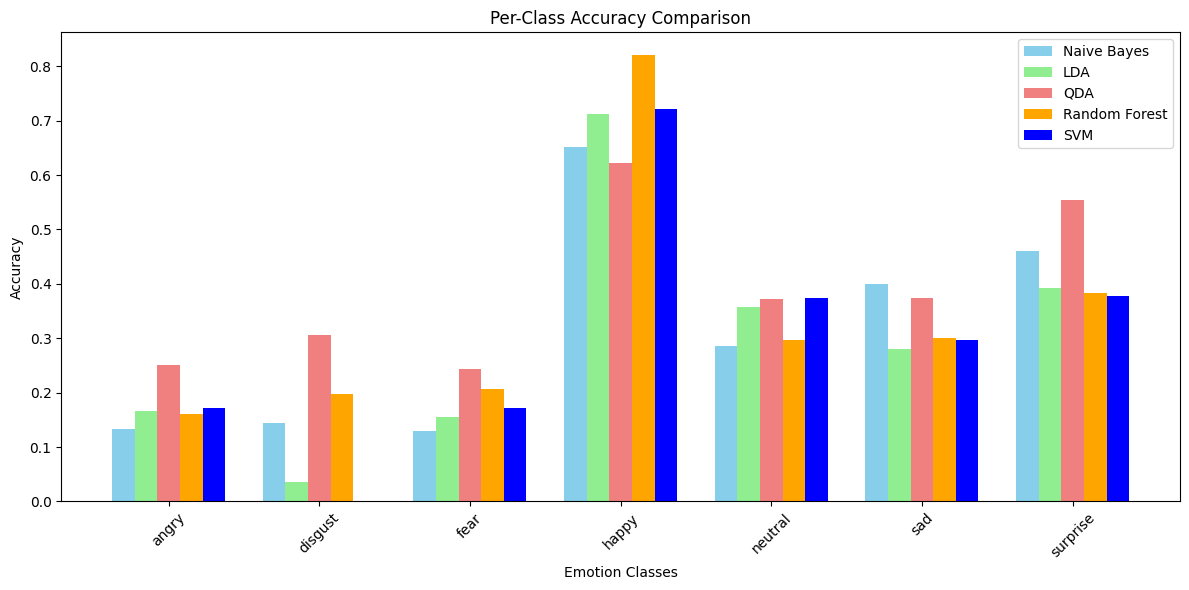

In [55]:
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# === Per-Class Accuracy for Naive Bayes ===
nb_classwise_accuracy = classification_report(y_test, nb_test_predictions, target_names=le.classes_, output_dict=True, zero_division=0)
nb_classwise_accuracy = [nb_classwise_accuracy[label]['recall'] for label in le.classes_]

# === Per-Class Accuracy for LDA ===
lda_classwise_accuracy = classification_report(y_test, lda_test_predictions, target_names=le.classes_, output_dict=True, zero_division=0)
lda_classwise_accuracy = [lda_classwise_accuracy[label]['recall'] for label in le.classes_]

# === Per-Class Accuracy for QDA ===
qda_classwise_accuracy = classification_report(y_test, qda_test_predictions, target_names=le.classes_, output_dict=True, zero_division=0)
qda_classwise_accuracy = [qda_classwise_accuracy[label]['recall'] for label in le.classes_]

# === Per-Class Accuracy for Random Forest ===
rf_classwise_accuracy = classification_report(y_test, rf_test_predictions, target_names=le.classes_, output_dict=True, zero_division=0)
rf_classwise_accuracy = [rf_classwise_accuracy[label]['recall'] for label in le.classes_]

# === Per-Class Accuracy for SVM ===
svm_classwise_accuracy = classification_report(y_test, test_predictions, target_names=le.classes_, output_dict=True, zero_division=0)
svm_classwise_accuracy = [svm_classwise_accuracy[label]['recall'] for label in le.classes_]

# === Plotting Comparison ===
plt.figure(figsize=(12, 6))
x = np.arange(len(le.classes_))  # Number of classes
width = 0.15  # Bar width

# Plotting each model's per-class accuracy
plt.bar(x - 2 * width, nb_classwise_accuracy, width, label='Naive Bayes', color='skyblue')
plt.bar(x - width, lda_classwise_accuracy, width, label='LDA', color='lightgreen')
plt.bar(x, qda_classwise_accuracy, width, label='QDA', color='lightcoral')
plt.bar(x + width, rf_classwise_accuracy, width, label='Random Forest', color='orange')
plt.bar(x + 2 * width, svm_classwise_accuracy, width, label='SVM', color='blue')

# Adding labels and titles
plt.xticks(x, le.classes_, rotation=45)
plt.xlabel("Emotion Classes")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy Comparison")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# Then I have make the confusion matrix of all the classifier i have used to visualize by which accuracy they are working .

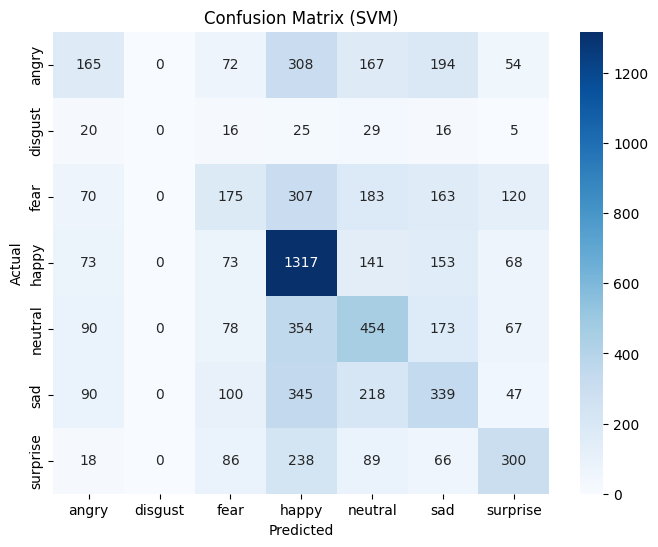

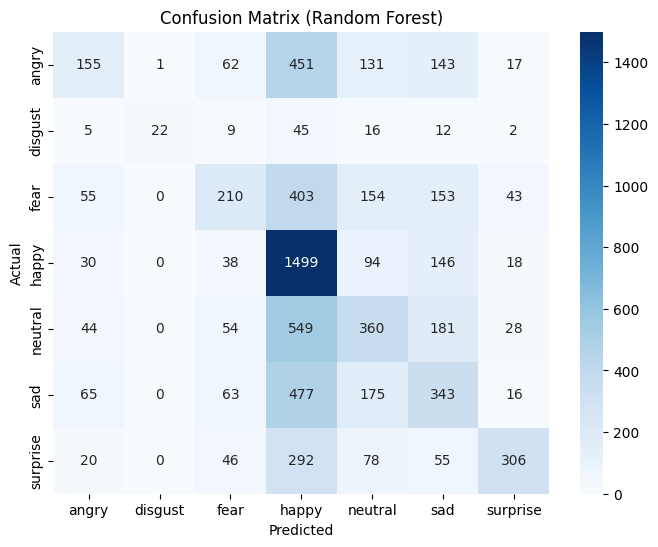

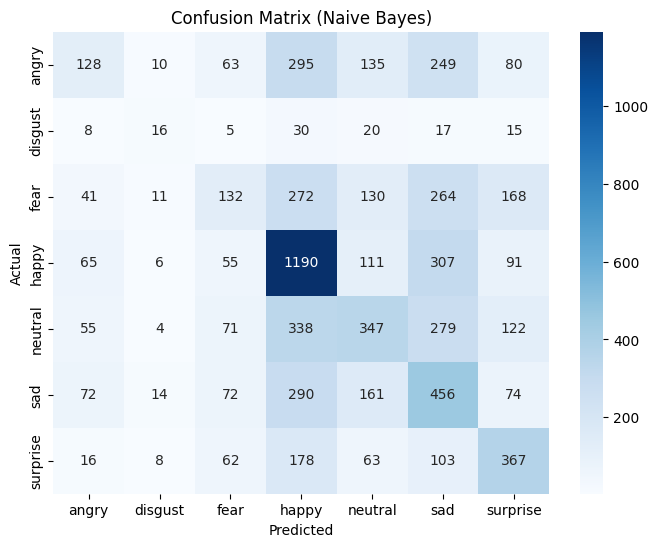

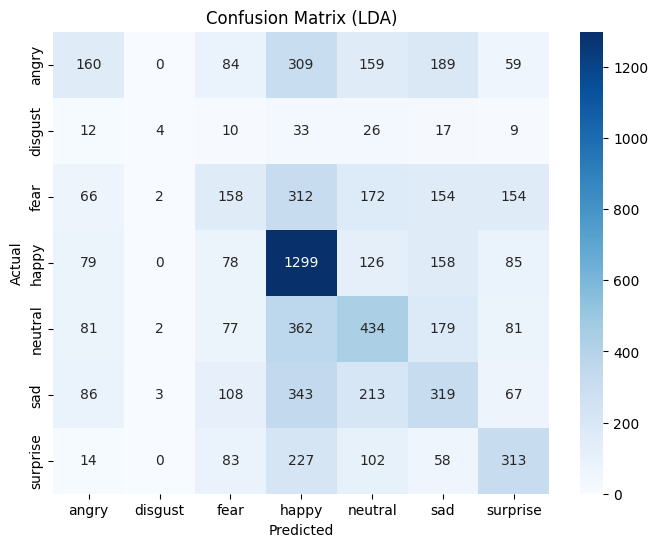

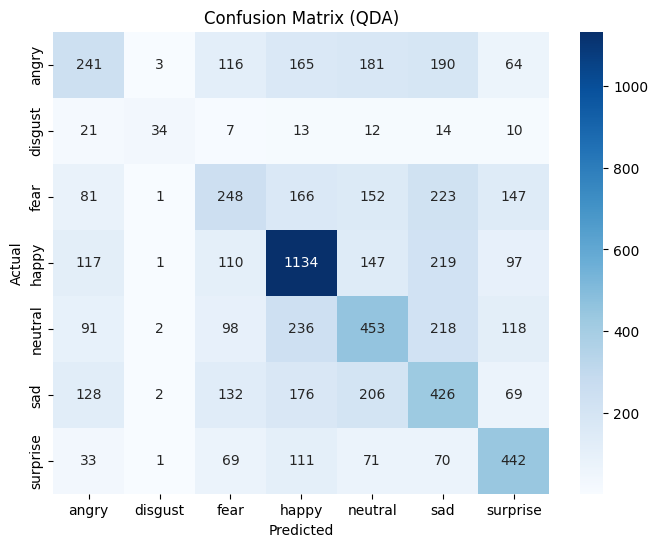

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion Matrices for all models
models_predictions = {
    'SVM': test_predictions,
    'Random Forest': rf_test_predictions,
    'Naive Bayes': nb_test_predictions,
    'LDA': lda_test_predictions,
    'QDA': qda_test_predictions
}

# Plot confusion matrices for each model
for model_name, predictions in models_predictions.items():
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, model_name, le.classes_)


# I got less accuracy with these classifier , actually problem is that CNN can extract features by itself but for SVM i have to extract feature by myself by applying HOG like feature extracter but that is the problem, it doesn not done greatlt because for smiling stretching lips , for angry changing of eyebrows pattern is tough HOG .

# The solution of this is to train the model by by CNN and remove the last layer of CNN and here apply the classifier so that my accuacy can be inreased by this.